In [1]:
#-----------------------------------------------------------FACE MASK DETECTION USING CNN---------------------------------------------------------------
#----------------------------------------------------------Started on 24-11-2024 11.30 am--------------------------------------------------------------- 
import os   #For accessing files 
import pathlib
import numpy as np
import matplotlib.pyplot as plt   #For Visualization
import matplotlib.image as mpimg   #For Visualization
import cv2  #For image processing
from PIL import Image
from sklearn.model_selection import train_test_split 

In [2]:
#Checking the contents in the Project Folder 

data_dir = pathlib.Path(r"C:\Users\Dell\Desktop\P\Face mask detection\data")
class_name = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_name)

['with_mask' 'without_mask']


In [3]:
#Checking the contents of the files
with_mask_files = os.listdir(os.path.join(data_dir,class_name[0]))
#print(with_mask_files[0:5])
without_mask_files = os.listdir(os.path.join(data_dir,class_name[1]))
#print(without_mask_files[0:5])

In [4]:
#Number of images in each files
print('Number of with mask images : ',len(with_mask_files))
print('Number of without mask images : ',len(without_mask_files))

Number of with mask images :  3727
Number of without mask images :  3838


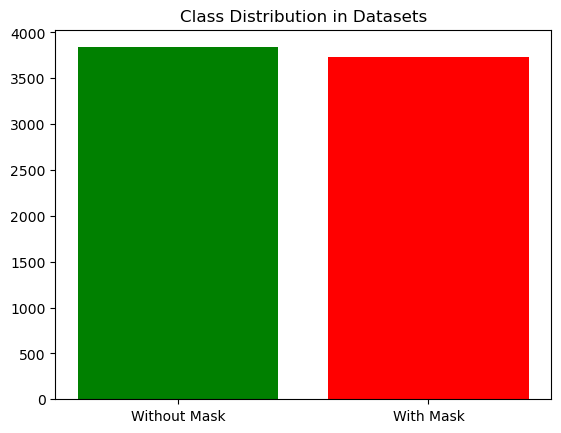

In [5]:
plt.bar(["Without Mask", "With Mask"], [len(without_mask_files),len(with_mask_files)], color=["green", "red"])
plt.title("Class Distribution in Datasets")
plt.show()

In [6]:
with_mask_path = os.path.join(data_dir,class_name[0])
without_mask_path = os.path.join(data_dir,class_name[1])

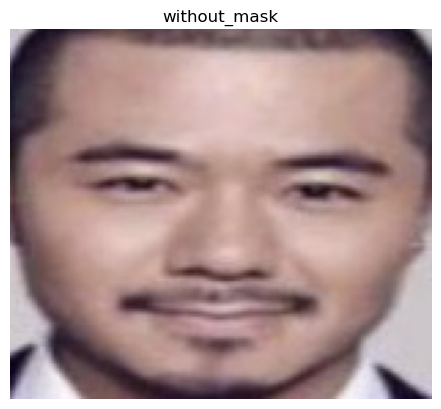

In [7]:
#Displaying images
#Without mask
img = mpimg.imread(os.path.join(without_mask_path,without_mask_files[10]))
plt.imshow(img)
plt.axis('off')
plt.title(class_name[1])
plt.show()

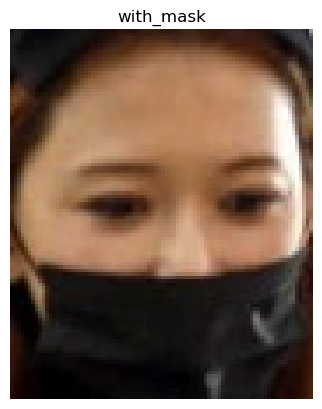

In [8]:
#With mask
img = mpimg.imread(os.path.join(with_mask_path,with_mask_files[4]))
plt.imshow(img)
plt.title(class_name[0])
plt.axis('off')
plt.show()

In [9]:
#Creating Labels 
labels = [0]*len(without_mask_files) + [1]*len(with_mask_files) 

In [10]:
#-----------------------------------------------------------------Image Processing--------------------------------------------------------------------- 

In [11]:
#Image processing
# 1) Resizing the images
# 2) Converting the images to numpy array

data = []

for img_file in with_mask_files:
    image = Image.open(os.path.join(with_mask_path,img_file))
    image = image.resize((112,112))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

for img_file in without_mask_files:
    image = Image.open(os.path.join(without_mask_path,img_file))
    image = image.resize((112,112))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)



C:\Users\Dell\anaconda3\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [12]:
print(data[3]) #Outputs the resized numpy array version of the first image in the data

[[[119  64  18]
  [126  70  23]
  [133  76  29]
  ...
  [ 87  54  25]
  [ 85  51  26]
  [ 87  52  30]]

 [[131  75  28]
  [131  75  28]
  [124  67  21]
  ...
  [ 79  45  17]
  [ 75  41  15]
  [ 76  41  19]]

 [[125  69  22]
  [123  67  21]
  [108  54  10]
  ...
  [ 76  42  14]
  [ 79  45  19]
  [ 80  45  23]]

 ...

 [[172 133  67]
  [179 140  74]
  [173 134  68]
  ...
  [200 162  97]
  [194 156  91]
  [185 147  82]]

 [[184 143  77]
  [185 144  78]
  [177 137  71]
  ...
  [209 172 105]
  [204 166 101]
  [188 150  85]]

 [[192 151  83]
  [187 147  79]
  [179 138  71]
  ...
  [214 177 109]
  [213 176 108]
  [203 164  97]]]


In [13]:
# Outputs (Dimension and colour channels)
print(data[0].shape)   

(112, 112, 3)


In [14]:
x = np.array(data)
y = np.array(labels)

print(type(x))  # numpy.ndarray = numpy n-dimensional array
print(x.shape)  # (Total size, Dimension(224x224 in this case), Color Channels)

print(type(y))  # numpy.ndarray = numpy n-dimensional array
print(y.shape)  # (Total size, Dimension(224x224 in this case), Color Channels)

<class 'numpy.ndarray'>
(7565, 112, 112, 3)
<class 'numpy.ndarray'>
(7565,)


In [15]:
# Training and Testing Data split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)
print(x.shape, x_train.shape, x_test.shape)

(7565, 112, 112, 3) (6052, 112, 112, 3) (1513, 112, 112, 3)


In [16]:
#Scaling of data  (Numpy arrays are ranged/scaled down between 0 to 1)

x_train_scaled = (x_train/255)
x_test_scaled = (x_test/255)

In [19]:
print(x_train_scaled[0])

[[[0.47843137 0.42352941 0.32156863]
  [0.45490196 0.39607843 0.31372549]
  [0.41960784 0.36078431 0.26666667]
  ...
  [0.09411765 0.05098039 0.04705882]
  [0.08627451 0.04313725 0.03137255]
  [0.07843137 0.03529412 0.02352941]]

 [[0.49019608 0.42352941 0.3254902 ]
  [0.46666667 0.39607843 0.31764706]
  [0.43921569 0.37254902 0.28235294]
  ...
  [0.0745098  0.04705882 0.03137255]
  [0.05882353 0.03921569 0.03137255]
  [0.0627451  0.03921569 0.03529412]]

 [[0.49803922 0.42745098 0.32941176]
  [0.47058824 0.39607843 0.30980392]
  [0.45882353 0.38823529 0.29019608]
  ...
  [0.08627451 0.04705882 0.02745098]
  [0.08627451 0.04313725 0.04313725]
  [0.09019608 0.05882353 0.05490196]]

 ...

 [[0.33333333 0.29411765 0.20392157]
  [0.28627451 0.2627451  0.14901961]
  [0.22745098 0.18823529 0.10196078]
  ...
  [0.07843137 0.04705882 0.01176471]
  [0.07058824 0.04313725 0.01176471]
  [0.03137255 0.02352941 0.01568627]]

 [[0.31372549 0.25882353 0.17647059]
  [0.26666667 0.23529412 0.1372549 ]


In [22]:
#-------------------------------------------------------Building A Convolutional Neural Network----------------------------------------------------------

In [25]:
import tensorflow as tf
from tensorflow import keras  #Keras backed up by Tensorflow

In [26]:
no_of_class = 2
#Defining the Model Layers 
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=(3,3), activation='relu',input_shape=(112,112,3)))  #Convolutional Layer with 32 filters and ReLu Activation
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3), activation='relu'))  #Convolutional Layer with 64 filters and ReLu Activation
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())  #Flatten Layer passes the 2D matrix of data into 1D vector 

#Creating Dense Layers
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.2))       #Dropout randomly leaves a fraction of neurons while training to prevent overfitting

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(no_of_class, activation='sigmoid'))  #Sigmoid for Binary classification

C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
#Compile the neural network
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics = ['Accuracy'])

In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 110, 110, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 55, 55, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 53, 53, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 43264)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     5,537,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,565,698 (21.23 MB)

 Trainable params: 5,565,698 (21.23 MB)

 Non-trainable params: 0 (0.00 B)

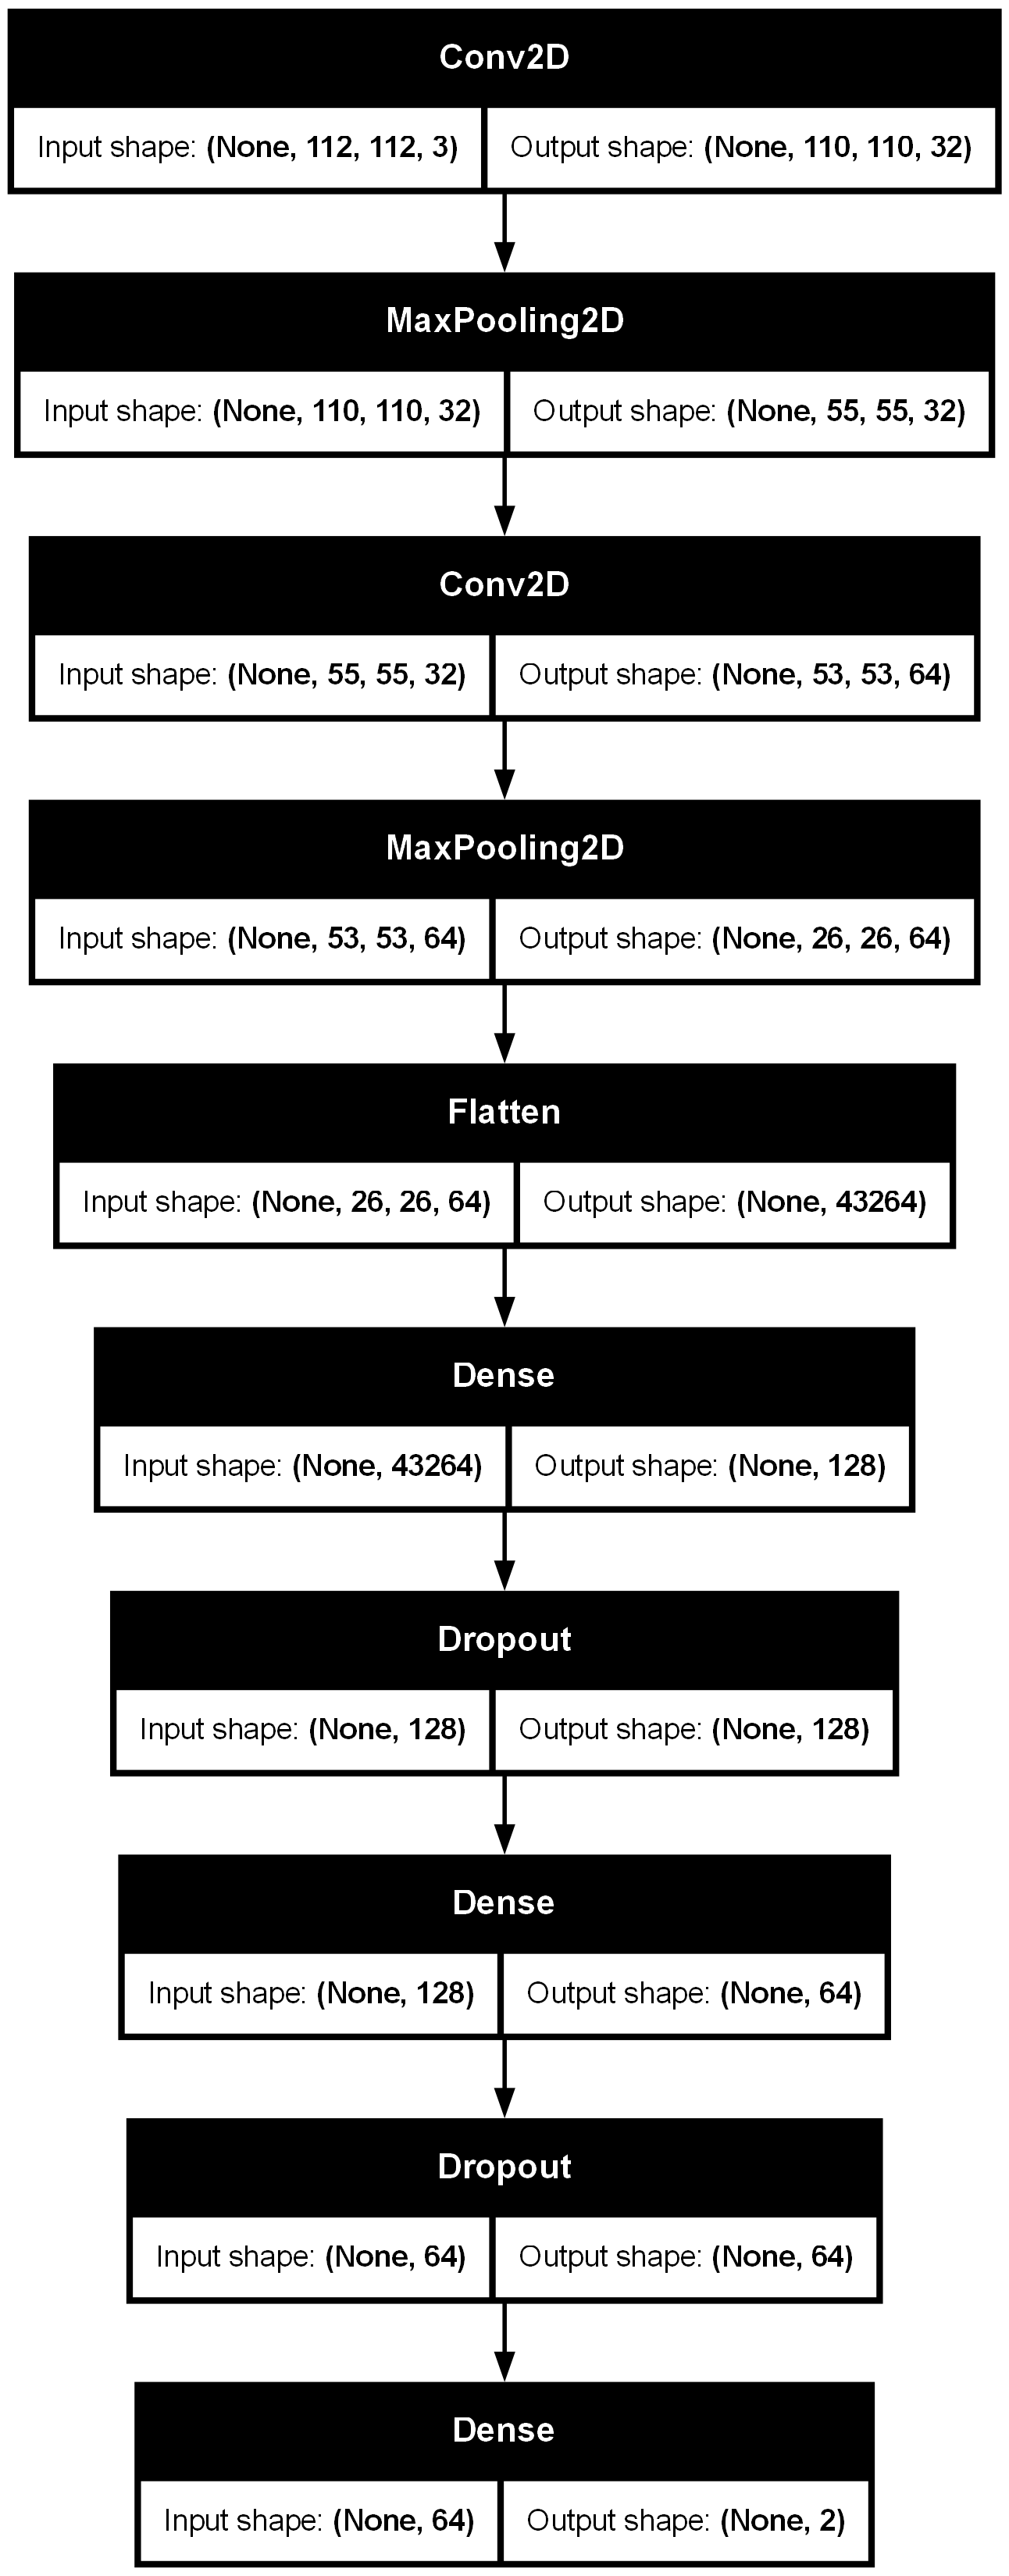

In [33]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file=r"C:\Users\Dell\Desktop\P\Face mask detection\model_architecture.png", show_shapes=True)

In [71]:
#Training the Model
history = model.fit(x_train_scaled,y_train,validation_split=0.001,epochs=15)

Epoch 1/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 44s 222ms/step - Accuracy: 0.9873 - loss: 0.0405 - val_Accuracy: 0.8571 - val_loss: 0.4233
Epoch 2/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 41s 217ms/step - Accuracy: 0.9884 - loss: 0.0396 - val_Accuracy: 0.8571 - val_loss: 0.6438
Epoch 3/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 41s 215ms/step - Accuracy: 0.9892 - loss: 0.0302 - val_Accuracy: 0.8571 - val_loss: 0.8100
Epoch 4/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 41s 216ms/step - Accuracy: 0.9931 - loss: 0.0186 - val_Accuracy: 0.8571 - val_loss: 0.5895
Epoch 5/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 41s 219ms/step - Accuracy: 0.9869 - loss: 0.0341 - val_Accuracy: 0.7143 - val_loss: 0.7381
Epoch 6/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 40s 214ms/step - Accuracy: 0.9949 - loss: 0.0162 - val_Accuracy: 0.8571 - val_loss: 0.6137
Epoch 7/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 40s 209ms/step - Accuracy: 0.9931 - loss: 0.0266 - val_Accuracy: 0.8571 - val_loss: 0.5474
Epoch 8/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 39s 205ms/step - Accuracy: 0.9924 - loss: 0

In [72]:
# Model Evaluation 

loss, accuracy = model.evaluate(x_test_scaled,y_test)
print('Test Accuracy',accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - Accuracy: 0.9244 - loss: 0.5150
Test Accuracy 0.9306014776229858


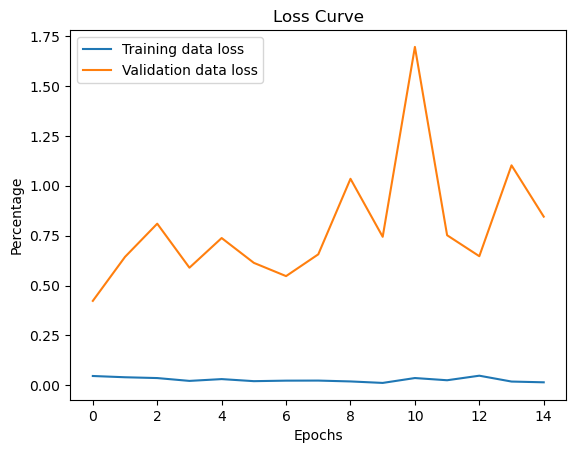

In [73]:
#Plotting the Loss Value

plt.plot(history.history['loss'],label='Training data loss')
plt.plot(history.history['val_loss'],label='Validation data loss')
plt.legend()
plt.ylabel('Percentage')
plt.xlabel('Epochs')
plt.title('Loss Curve')
plt.show()


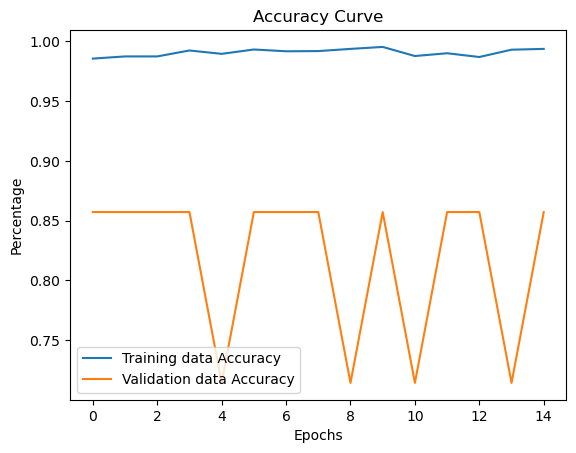

In [74]:
#Plotting the Accuracy Value

plt.plot(history.history['Accuracy'],label='Training data Accuracy')
plt.plot(history.history['val_Accuracy'],label='Validation data Accuracy')
plt.legend()
plt.ylabel('Percentage')
plt.xlabel('Epochs')
plt.title('Accuracy Curve')
plt.show()


In [75]:
model.save('FaceMask.keras')

Path of the image to be predicted C:\Users\Dell\Desktop\P\Face mask detection\Trial3.jpg


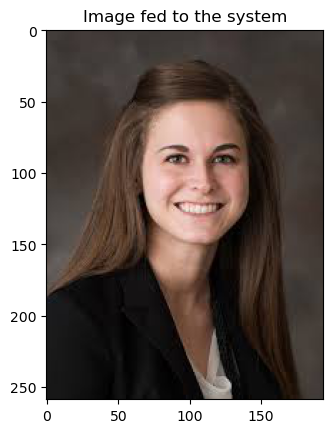

In [100]:
## ----------------------------------------------------------Creating a Predictive System---------------------------------------------------------------

input_image_path = input('Path of the image to be predicted')
input_image = mpimg.imread(input_image_path)
plt.imshow(input_image)
plt.title('Image fed to the system')
plt.show()

In [77]:
#Loading the model
from keras.models import load_model
model = load_model('FaceMask.keras')

In [78]:
#Preprocessing the fed Image 

inp_img = cv2.imread(input_image_path)

inp_image_resized = cv2.resize(inp_img,(112,112))
inp_image_scaled = inp_image_resized/255

input_image_reshaped = np.reshape(inp_image_scaled,[1,112,112,3])
input_prediction = model.predict(input_image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
[[0.7844079  0.13350101]]


In [79]:
pred_label = np.argmax(input_prediction)
result = ["Without Mask","With Mask"]
print('Prediction Made By the Model :',result[pred_label])

Prediction Made By the Model : Without Mask
